<a href="https://colab.research.google.com/github/DRG2399/steam-classificacao-ia/blob/main/Trabalho_IA_Steam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Comparativo de Modelos:
               Accuracy  Precision (1)  Recall (1)  F1-Score (1)
Decision Tree    0.5907         0.5294      0.4834        0.5053
Random Forest    0.6261         0.5796      0.4936        0.5331
SVM              0.6040         0.6364      0.1969        0.3008
Naive Bayes      0.5520         0.4774      0.3785        0.4223


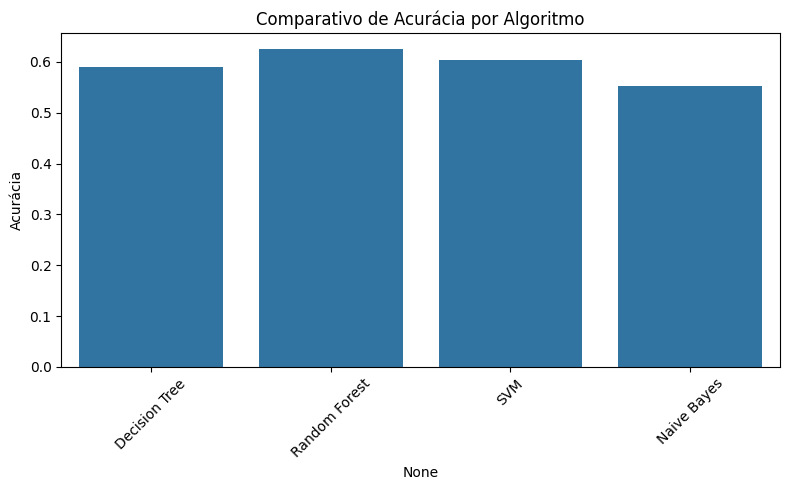

In [1]:
# Trabalho de IA - Classificação de Jogos Steam

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados
steam_df = pd.read_csv('steam.csv')

# 2. Criar a variável-alvo baseada nas avaliações dos usuários
steam_df = steam_df[(steam_df['positive_ratings'] + steam_df['negative_ratings']) > 0]
steam_df['user_score'] = steam_df['positive_ratings'] / (steam_df['positive_ratings'] + steam_df['negative_ratings'])
steam_df['target'] = (steam_df['user_score'] > 0.8).astype(int)

# 3. Converter release_date para release_year
steam_df['release_date'] = pd.to_datetime(steam_df['release_date'], errors='coerce')
steam_df['release_year'] = steam_df['release_date'].dt.year

# 4. Selecionar e tratar colunas
cols = ['price', 'release_year', 'developer', 'average_playtime', 'target']
df_model = steam_df[cols].dropna()

# 5. Codificar a coluna categórica 'developer'
le = LabelEncoder()
df_model['developer'] = le.fit_transform(df_model['developer'].astype(str))

# 6. Separar variáveis preditoras e alvo
X = df_model.drop('target', axis=1)
y = df_model['target']

# 7. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Inicializar e treinar modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'classification_report': cr
    }

# 9. Tabela de comparação
comparison = pd.DataFrame({
    model: {
        'Accuracy': round(results[model]['accuracy'], 4),
        'Precision (1)': round(results[model]['classification_report']['1']['precision'], 4),
        'Recall (1)': round(results[model]['classification_report']['1']['recall'], 4),
        'F1-Score (1)': round(results[model]['classification_report']['1']['f1-score'], 4)
    }
    for model in results
}).T

print("\nComparativo de Modelos:")
print(comparison)

# 10. Gráfico de Acurácias
plt.figure(figsize=(8, 5))
sns.barplot(x=comparison.index, y=comparison['Accuracy'])
plt.title('Comparativo de Acurácia por Algoritmo')
plt.ylabel('Acurácia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()